In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df=pd.read_csv("iriskmean.csv")

In [3]:
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [4]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [5]:
df.tail()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2
149,149,5.9,3.0,5.1,1.8,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [7]:
df.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df=df.drop("Unnamed: 0",axis=1)


In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df.shape

(150, 5)

## EDA

In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [25]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [27]:
duplicate=df[df.duplicated()]

In [29]:
duplicate

,sepal_length,sepal_width,petal_length,petal_width,target
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [31]:
data1=df[['sepal_length','sepal_width','petal_length','petal_width']]

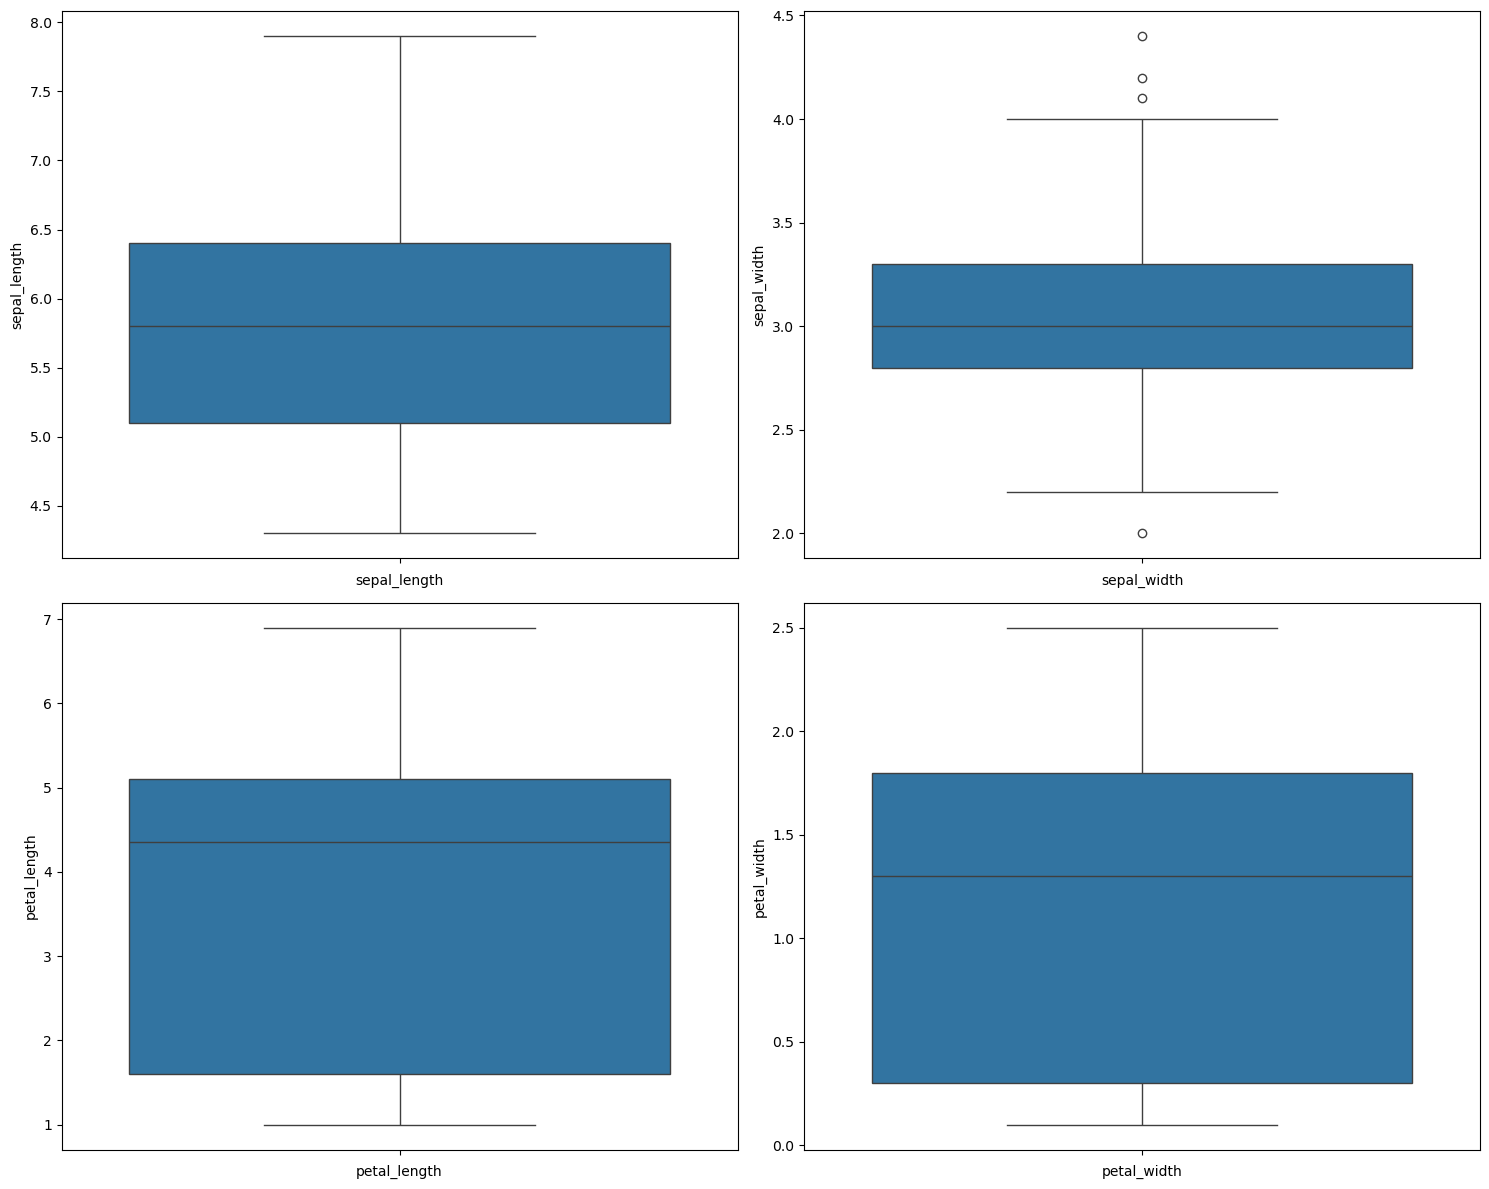

In [43]:
plt.figure(figsize=(15,12))
plot_num=1
for i in data1.columns:
    plt.subplot(2,2,plot_num)
    sns.boxplot(y=df[i])
    plot_num=plot_num+1
    plt.xlabel(i)
plt.tight_layout()

In [45]:
df.loc[df["sepal_width"]>4.0,'sepal_width']=np.median(df.sepal_width)

In [47]:
df.loc[df["sepal_width"]>4.0]

,sepal_length,sepal_width,petal_length,petal_width,target


In [49]:
df.loc[df["sepal_width"]<2.2,"sepal_width"]=np.median(df.sepal_width)

<Axes: ylabel='sepal_width'>

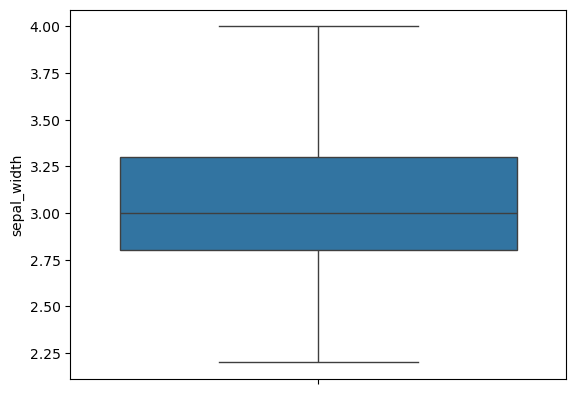

In [51]:
sns.boxplot(df["sepal_width"])

In [53]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.111724,0.871754,0.817954,0.782561
sepal_width,-0.111724,1.000000,-0.387514,-0.321513,-0.388758
petal_length,0.871754,-0.387514,1.000000,0.962757,0.949043
petal_width,0.817954,-0.321513,0.962757,1.000000,0.956464
target,0.782561,-0.388758,0.949043,0.956464,1.000000


<Axes: >

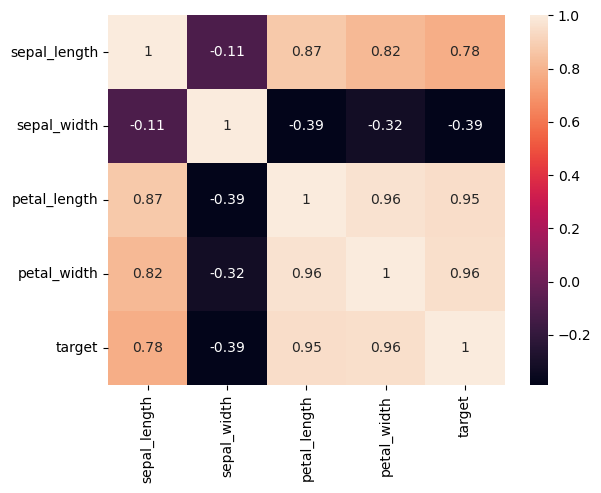

In [102]:
sns.heatmap(df.corr(),annot=True)

In [104]:
x=df.drop("target",axis=1)

In [110]:
y=df["target"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [106]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [114]:
from sklearn.cluster import KMeans

In [116]:
model=KMeans(n_clusters=6)

In [122]:
model.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [124]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 3, 5, 3, 5, 3, 5,
       5, 3, 5, 3, 1, 5, 1, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 1, 3, 5, 5, 5,
       3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 4, 1, 4, 4, 4, 2, 3, 2, 4, 2,
       4, 1, 4, 1, 1, 4, 4, 2, 2, 1, 4, 1, 2, 1, 4, 2, 1, 1, 4, 4, 2, 2,
       4, 1, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])

In [128]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [130]:
model.cluster_centers_

array([[5.006     , 3.344     , 1.464     , 0.244     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [5.48333333, 2.63333333, 3.90416667, 1.2       ],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [6.32916667, 2.93333333, 4.54166667, 1.42916667]])

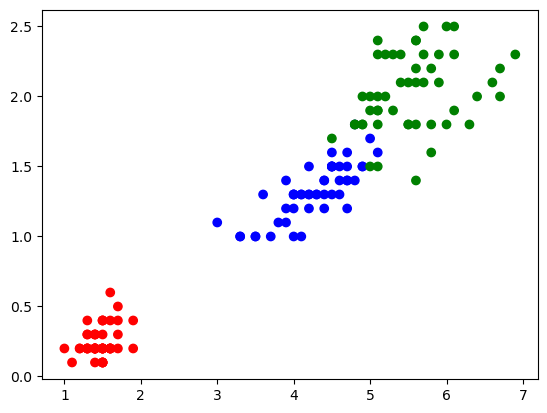

In [136]:
color_scheme=np.array(['red','blue','green','yellow','pink','cyan'])
plt.scatter(df.petal_length,df.petal_width,color=color_scheme[df.target])

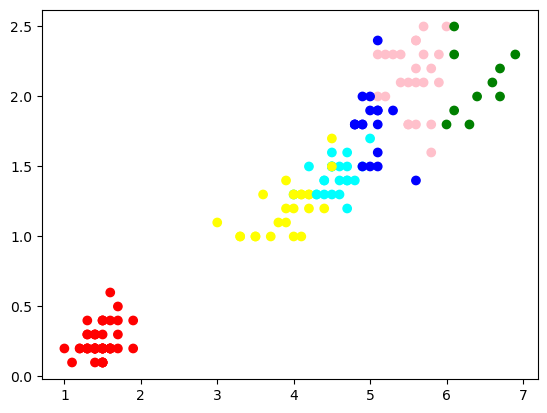

In [140]:
plt.scatter(x.petal_length,x.petal_width,color=color_scheme[model.labels_])

Elbow technique


In [149]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=45)
    model.fit(x)
    model.inertia_
    wcss.append(model.inertia_)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [151]:
wcss

[675.4573999999999,
 149.2879861111111,
 76.65610517023958,
 55.22013035714285,
 44.504982051282056,
 40.84328290598291,
 36.07547721751932,
 34.6913876753425,
 33.654143434908605,
 31.898529437794608]

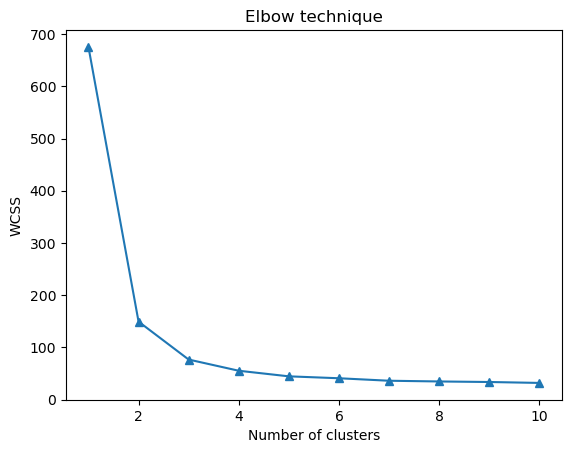

In [153]:
plt.plot(range(1,11),wcss,marker='^')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow technique")
plt.show()

In [163]:
model=KMeans(n_clusters=3)
model.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [165]:
cluster_labels=model.labels_

In [167]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [169]:
color_scheme=np.array(["red","green","blue"])


In [171]:
model.cluster_centers_

array([[5.88360656, 2.75737705, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.344     , 1.464     , 0.244     ]])

In [173]:
df.target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

evaluation metrics

In [176]:
model.inertia_

76.65610517023958

In [184]:
label=model.labels_
label
from sklearn.metrics import silhouette_score
score=silhouette_score(x,label)
score

0.5531602359821158

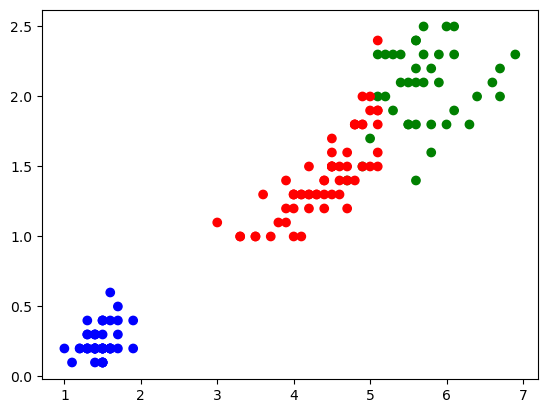

In [186]:
plt.scatter(x.petal_length,x.petal_width,color=color_scheme[model.labels_])

range of silhouette score is [-1,+1]


+1 score - near +1